# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [7]:
import jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow
print(cv2.__version__)
import time

3.1.0


In [8]:
"""Load pickled data"""
import pickle

training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [9]:
"""To start off let's do a basic data summary."""

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)
print("Type of X_train = ", type(X_train))
print("Type of y_train = ", type(y_train))

labels = {}
for el in y_train:
    if el in labels.keys():
        labels[el] += 1
    else:
        labels[el] = 1
        
print(labels.keys())
print(len(labels.keys()))

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
single_image = X_train[0][:][:][:]
image_shape = single_image.shape

# TODO: how many classes are in the dataset
n_classes = len(labels.keys())

print(' ')

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

X_train shape =  (39209, 32, 32, 3)
y_train shape =  (39209,)
X_test shape =  (12630, 32, 32, 3)
y_test shape =  (12630,)
Type of X_train =  <class 'numpy.ndarray'>
Type of y_train =  <class 'numpy.ndarray'>
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
43
 
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [10]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [11]:
"""Helper functions for data categorization and exploration"""

def make_class_dict(y):
    class_dict = {}
    num_el = len(y)
    for i in range(num_el):
        curr_class = y[i]
        if curr_class not in class_dict.keys():
            class_dict[curr_class] = [i]
        else:
            pos_index = class_dict[curr_class]
            pos_index.append(i)
            class_dict[curr_class] = pos_index
    return class_dict


import random
def plot_random(X, class_dict):
    for curr_class in class_dict.keys():
        pos_index = class_dict[curr_class]
        len_index = len(pos_index)
        i1 = random.randrange(len_index)
        i2 = random.randrange(len_index)
        i3 = random.randrange(len_index)
        print('Current class = ' + str(curr_class))
        index1 = pos_index[i1]
        index2 = pos_index[i2]
        index3 = pos_index[i3]
        im1 = X[index1][:][:][:]
        im2 = X[index2][:][:][:]
        im3 = X[index3][:][:][:]
        plt.figure()
        plt.subplot(131)
        plt.imshow(im1)
        plt.subplot(132)
        plt.imshow(im2)
        plt.subplot(133)
        plt.imshow(im3)
        plt.show() 
    plt.close("all")
    


Current class = 0


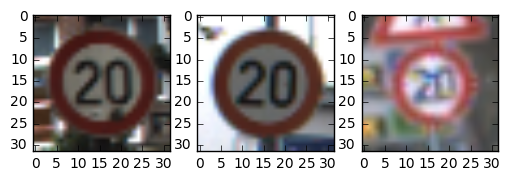

Current class = 1


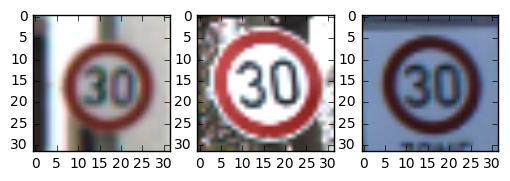

Current class = 2


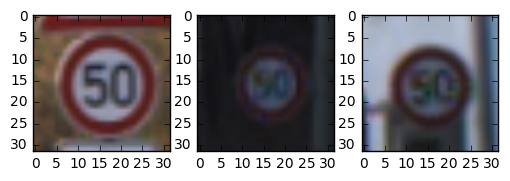

Current class = 3


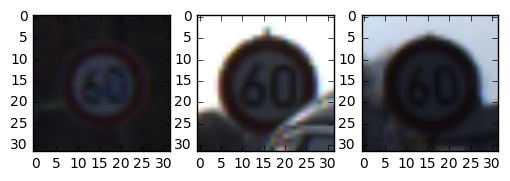

Current class = 4


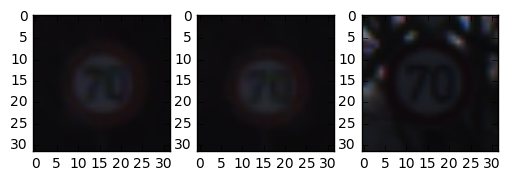

Current class = 5


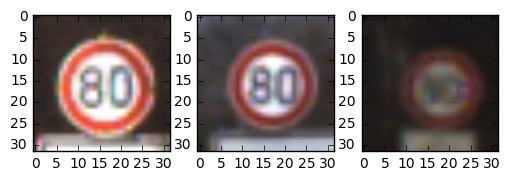

Current class = 6


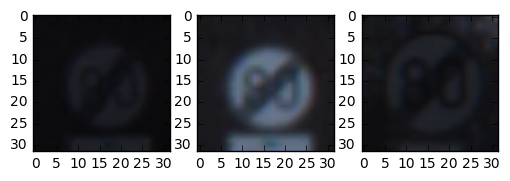

Current class = 7


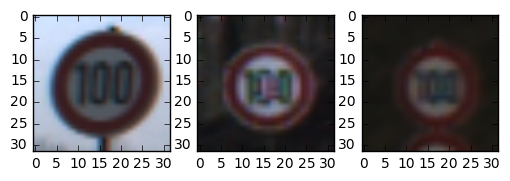

Current class = 8


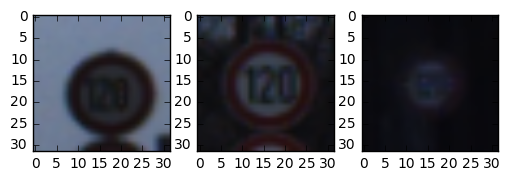

Current class = 9


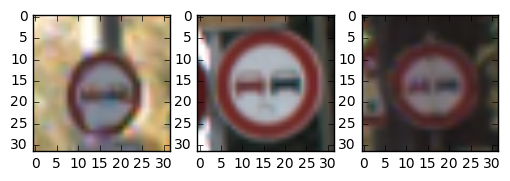

Current class = 10


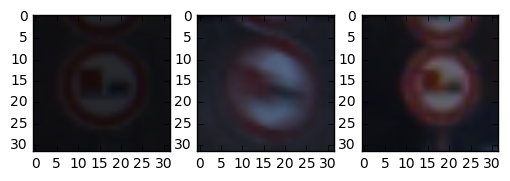

Current class = 11


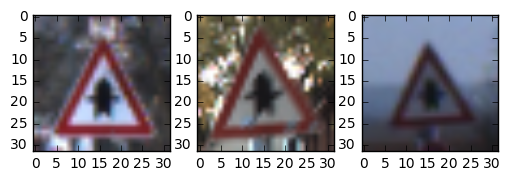

Current class = 12


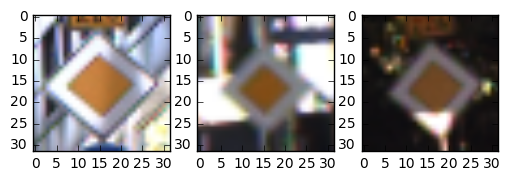

Current class = 13


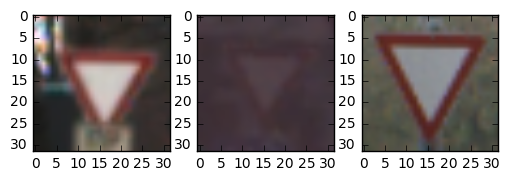

Current class = 14


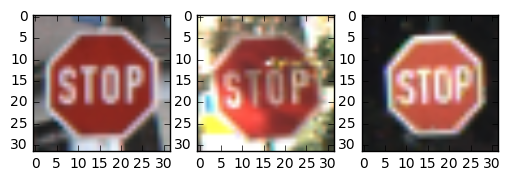

Current class = 15


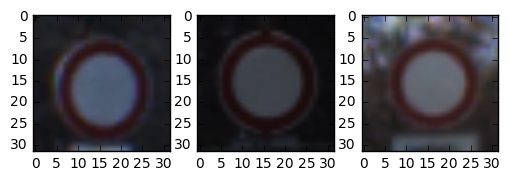

Current class = 16


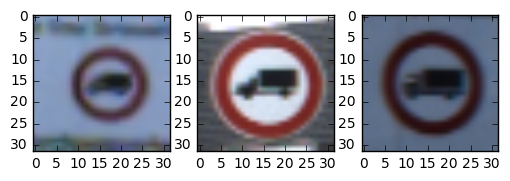

Current class = 17


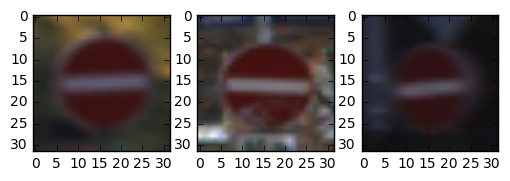

Current class = 18


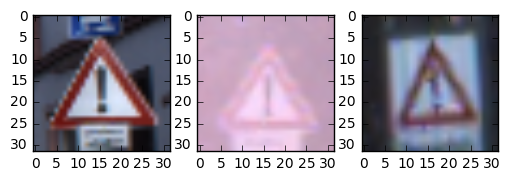

Current class = 19


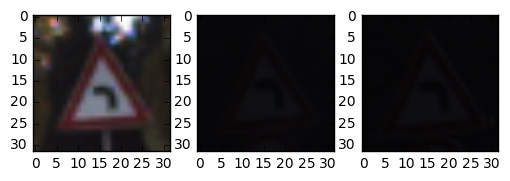

Current class = 20


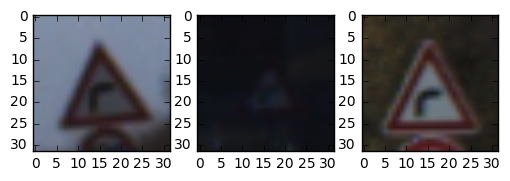

Current class = 21


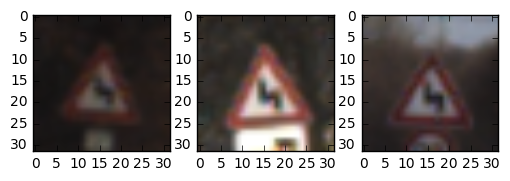

Current class = 22


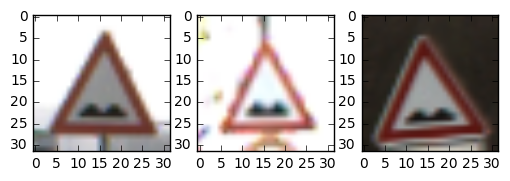

Current class = 23


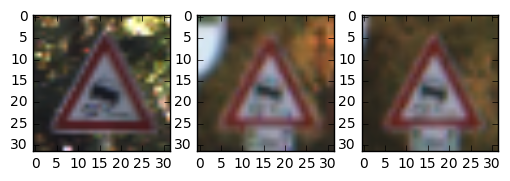

Current class = 24


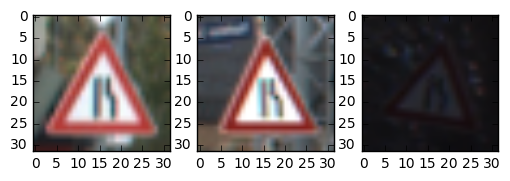

Current class = 25


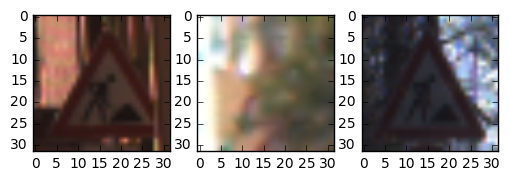

Current class = 26


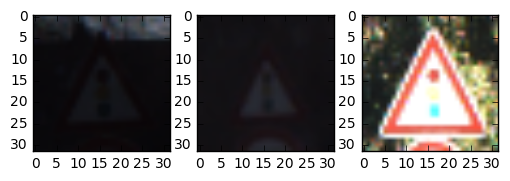

Current class = 27


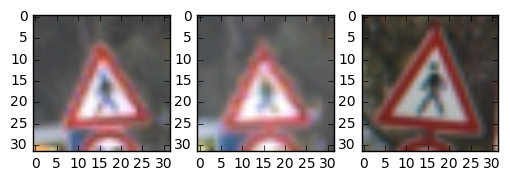

Current class = 28


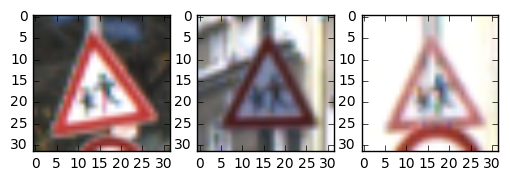

Current class = 29


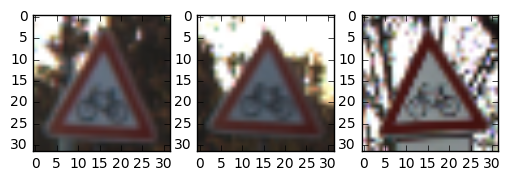

Current class = 30


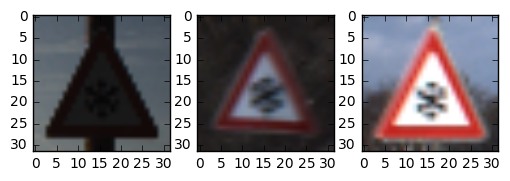

Current class = 31


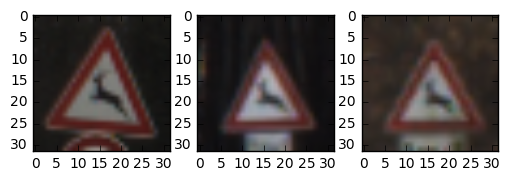

Current class = 32


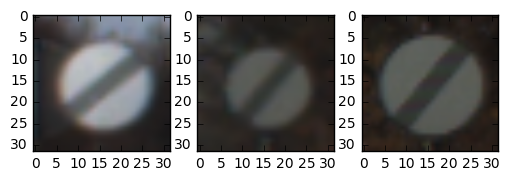

Current class = 33


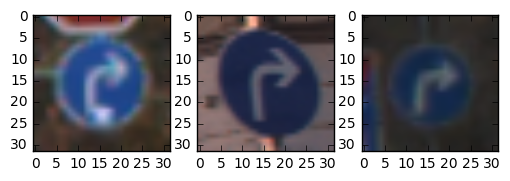

Current class = 34


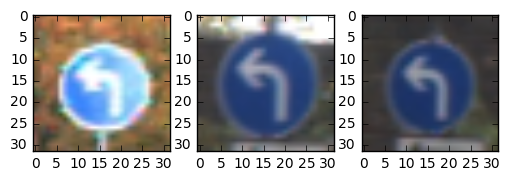

Current class = 35


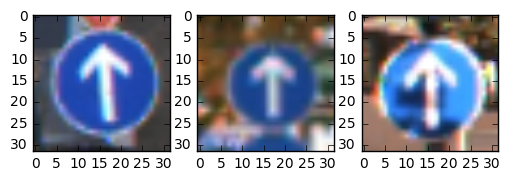

Current class = 36


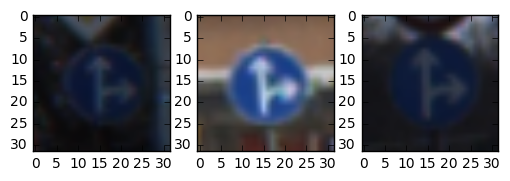

Current class = 37


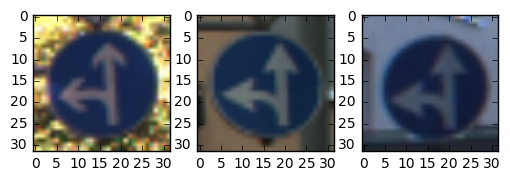

Current class = 38


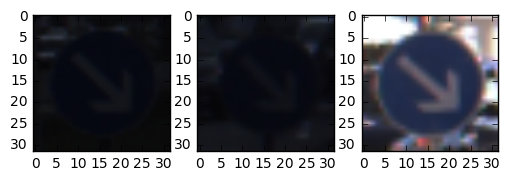

Current class = 39


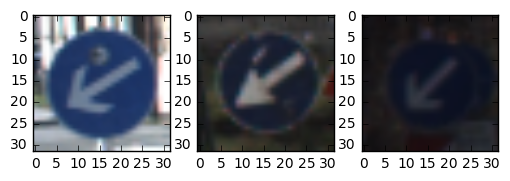

Current class = 40


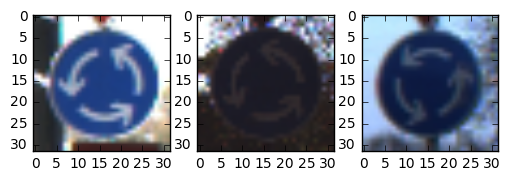

Current class = 41


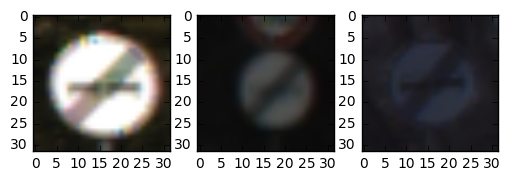

Current class = 42


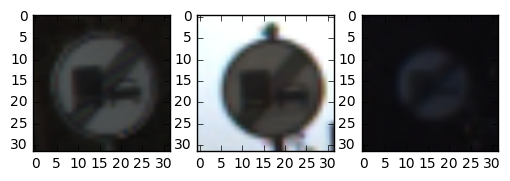

In [12]:
"""Organize images and display random ones from each class"""

class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

plot_random(X_train, class_dict_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [13]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [14]:
"""Import modules"""
import jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow as tf
import math
import random
import time
import math
import random
import pickle


In [25]:
"""Helper functions for pre-processing"""

"""Pre processing helper functions"""
def make_gaussian_blur(x, kernel_size):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = gaussian_blur(curr_im, kernel_size)
    return ret_images

def crop_to_ROI(x, vertices):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = get_ROI(curr_im, vertices)
    return ret_images

def normalize(x):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        empty_im = np.ones((x_shape[1],x_shape[2]))
        proc_im = cv2.normalize(curr_im, empty_im, -127,128,cv2.NORM_MINMAX)
        ret_images[i][:][:] = proc_im
    return ret_images

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def make_grayscale(x):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = grayscale(curr_im)
    return ret_images

def randomize_set(x,y):
    numel = len(y)
    print(type(x), type(y))
    print(x.shape, y.shape)
    listicle = [[i] for i in range(numel)]
    random.shuffle(listicle)
    x_shape = x.shape
    y_shape = y.shape
    ret_x = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    ret_y = np.ones((x_shape[0]))
    print(ret_x.shape, ret_y.shape)
    for i in range(numel):
        index = listicle[i]
        curr_x = x[index,:,:]
        curr_y = y[index]
        ret_x[i,:,:] = curr_x
        ret_y[i] = curr_y
        #print(index)
    return(ret_x,ret_y)

def make_one_hot_encoding(y, num_labels):
    print('Making one hot encoding')
    print(type(y), type(num_labels))
    print(y.shape, num_labels)
    y_shape = y.shape
    numel = y_shape[0]
    print(numel)
    #for i in range(numel):
    ret_y = np.zeros((numel, num_labels))
    print('Return y = ', ret_y.shape)
    for i in range(numel):
        curr_label = y[i]
        #print(i, curr_label)
        curr_encoding = np.zeros(num_labels)
        for j in range(num_labels):
            if j == int(curr_label):
                #print('Match!', j, curr_label)
                curr_encoding[j] = 1.0
        #print(curr_encoding)
        ret_y[i] = curr_encoding
    return ret_y

def expand_x(x):
    shape_x = x.shape
    print('Length is = ', len(shape_x))
    if len(shape_x) == 3:
        print('Expanding dataset to [num el, row, col, 1]')
        ret_x = np.empty((shape_x[0],shape_x[1],shape_x[2],1))
        ret_x[:,:,:,0] = x
        #print(ret_x.shape)
        #print('Example value = ', ret_x[0,0,0,0])
    return(ret_x)

In [ ]:
"""Helper functions for machine learning"""
"""Neural Network helper functions"""
def conv2d(x, W, b, strides=1):
	"""
	Args:
		x
		W
		b
		strides
	Returns:
		TBD
	"""
	x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
	x = tf.nn.bias_add(x, b)
	return tf.nn.tanh(x)

def maxpool2d(x, k=2):
	"""
	Args:
		x
		k
	Returns:
		TBD
	"""
	return tf.nn.max_pool(
	    x,
	    ksize=[1, k, k, 1],
	    strides=[1, k, k, 1],
	    padding='SAME')

# Create model
def conv_net(x, weights, biases):
	"""
	Args:
  		x:
  		weights:
  		biases:

	Returns:
		out:

	"""
#0 input 1 or 3 maps of 48x48 neurons
#1 convolutional 100 maps of 46x46 neurons 3x3
#2 max pooling 100 maps of 23x23 neurons 2x2
#3 convolutional 150 maps of 20x20 neurons 4x4
#4 max pooling 150 maps of 10x10 neurons 2x2
#5 convolutional 250 maps of 8x8 neurons 3x3
#6 max pooling 250 maps of 4x4 neurons 2x2
#7 fully connected 200 neurons
#8 fully connected 43 neurons



#1 convolutional 100 maps of 46x46 neurons 3x3
#2 max pooling 100 maps of 23x23 neurons 2x2
    # Layer 1
	conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
	conv1 = maxpool2d(conv1)

#3 convolutional 150 maps of 20x20 neurons 4x4
#4 max pooling 150 maps of 10x10 neurons 2x2
    # Layer 2
	conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
	conv2 = maxpool2d(conv2)

#5 convolutional 250 maps of 8x8 neurons 3x3
#6 max pooling 250 maps of 4x4 neurons 2x2
    # Layer 3
	conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
	conv3 = maxpool2d(conv2)

#7 fully connected 200 neurons
#8 fully connected 43 neurons
    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
	fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
	fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
	fc1 = tf.nn.tanh(fc1)

    # Output Layer - class prediction
	out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
	return out


In [16]:
"""Helper functions for data categorization, preprocessing, and exploration"""
def make_class_dict(y):
    class_dict = {}
    num_el = len(y)
    for i in range(num_el):
        curr_class = y[i]
        if curr_class not in class_dict.keys():
            class_dict[curr_class] = [i]
        else:
            pos_index = class_dict[curr_class]
            pos_index.append(i)
            class_dict[curr_class] = pos_index
    return class_dict

def plot_random(X, class_dict):
    for curr_class in class_dict.keys():
        pos_index = class_dict[curr_class]
        len_index = len(pos_index)
        i1 = random.randrange(len_index)
        i2 = random.randrange(len_index)
        i3 = random.randrange(len_index)
        print('Current class = ' + str(curr_class))
        index1 = pos_index[i1]
        index2 = pos_index[i2]
        index3 = pos_index[i3]
        im1 = X[index1][:][:][:]
        im2 = X[index2][:][:][:]
        im3 = X[index3][:][:][:]
        plt.figure()
        plt.subplot(131)
        plt.imshow(im1, cmap='Greys_r')
        plt.subplot(132)
        plt.imshow(im2, cmap='Greys_r')
        plt.subplot(133)
        plt.imshow(im3, cmap='Greys_r')
        plt.show()
        mean_im1, max_im1 = np.mean(im1), np.max(im1)
        mean_im2, max_im2 = np.mean(im2), np.max(im2)
        mean_im3, max_im3 = np.mean(im3), np.max(im3)
        print('Mean of im1,2,3 = ', mean_im1, mean_im2, mean_im3)
        print('Max of im1,2,3 = ', max_im1, max_im2, max_im3)
    plt.close("all")

def make_grayscale(x):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = grayscale(curr_im)
    return ret_images

def make_gaussian_blur(x, kernel_size):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = gaussian_blur(curr_im, kernel_size)
    return ret_images

def crop_to_ROI(x, vertices):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = get_ROI(curr_im, vertices)
    return ret_images

def normalize(x):
    x_shape = x.shape
    print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        empty_im = np.ones((x_shape[1],x_shape[2]))
        ret_images[i][:][:] = cv2.normalize(curr_im, empty_im, 0,255,cv2.NORM_MINMAX)
    return ret_images    

In [17]:
"""Organize datasets into dictionaries"""
class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

In [18]:
"""Preprocess datasets"""
X_test_preproc = X_test
X_test_preproc = make_grayscale(X_test_preproc)
X_test_preproc = make_gaussian_blur(X_test_preproc, 1)
X_test_preproc = normalize(X_test_preproc)

X_train_preproc = X_train
X_train_preproc = make_grayscale(X_train_preproc)
X_train_preproc = make_gaussian_blur(X_train_preproc, 1)
X_train_preproc = normalize(X_train_preproc)

(12630, 32, 32, 3)
(12630, 32, 32)
(12630, 32, 32)
(12630, 32, 32)
(12630, 32, 32)
(12630, 32, 32)
(39209, 32, 32, 3)
(39209, 32, 32)
(39209, 32, 32)
(39209, 32, 32)
(39209, 32, 32)
(39209, 32, 32)


Current class = 0


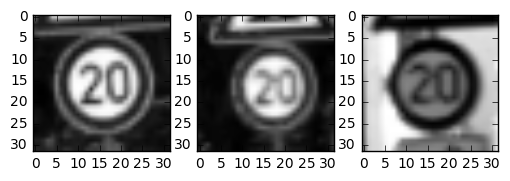

Mean of im1,2,3 =  67.3860002429 59.3795649963 111.026392774
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 1


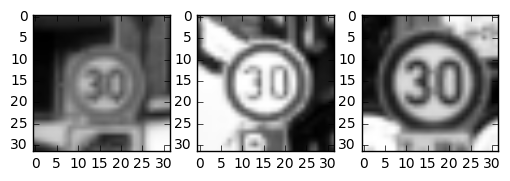

Mean of im1,2,3 =  79.7199813179 127.949348958 108.491210938
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 2


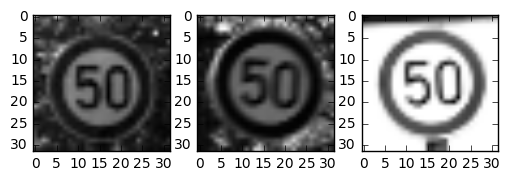

Mean of im1,2,3 =  45.9703650841 50.806194803 184.011106711
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 3


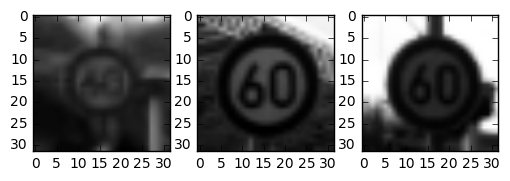

Mean of im1,2,3 =  45.5381910107 51.033203125 99.9999594787
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 4


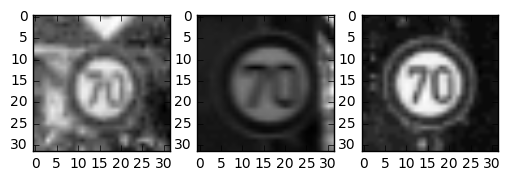

Mean of im1,2,3 =  92.2756347656 42.3248459002 56.3807508681
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 5


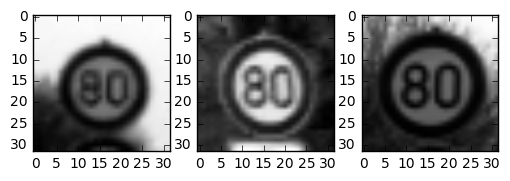

Mean of im1,2,3 =  125.496917725 64.2355957031 61.9911208662
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 6


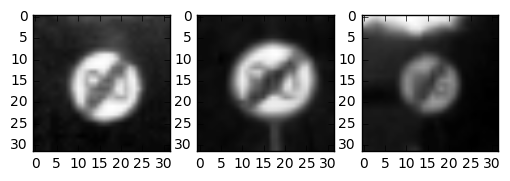

Mean of im1,2,3 =  54.9058948864 49.7311805817 42.1598704268
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 7


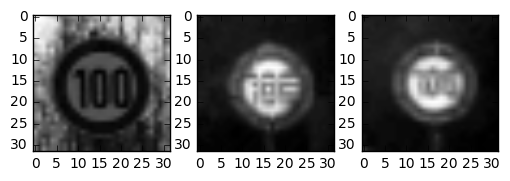

Mean of im1,2,3 =  70.3589509663 39.6537057977 40.8258536692
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 8


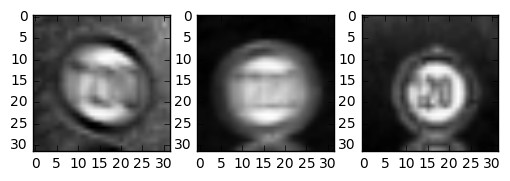

Mean of im1,2,3 =  75.6779711174 56.8959263393 52.8083405671
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 9


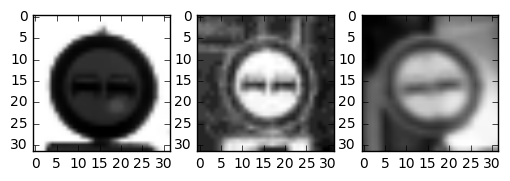

Mean of im1,2,3 =  129.634637348 87.2982788086 99.4418704456
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 10


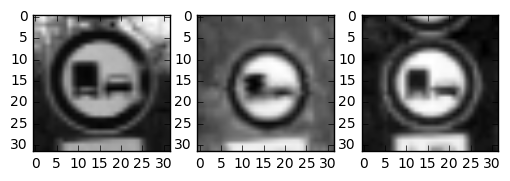

Mean of im1,2,3 =  75.1049804688 89.7638386052 70.1651410914
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 11


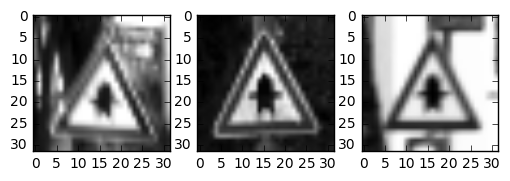

Mean of im1,2,3 =  95.0689907732 49.323913927 154.187894781
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 12


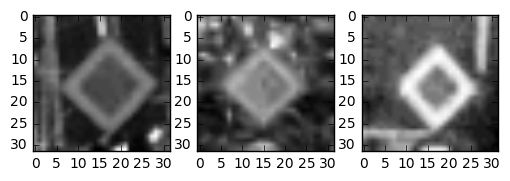

Mean of im1,2,3 =  56.956640625 70.9037642045 92.8857421875
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 13


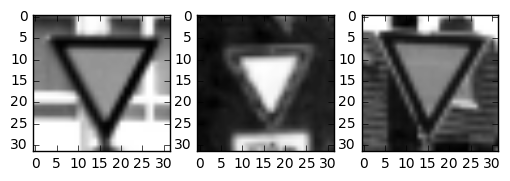

Mean of im1,2,3 =  131.961109058 60.0176487199 73.9891258446
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 14


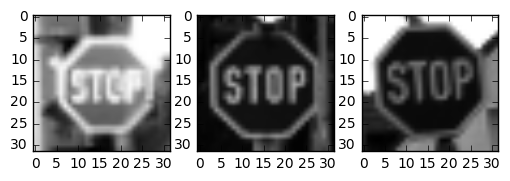

Mean of im1,2,3 =  128.451931958 39.9784150349 84.2081536891
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 15


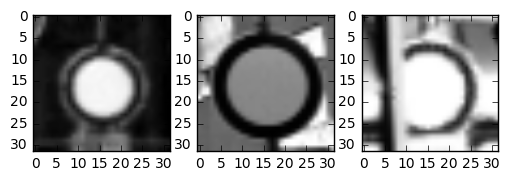

Mean of im1,2,3 =  56.7650158571 97.4522498985 153.178448185
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 16


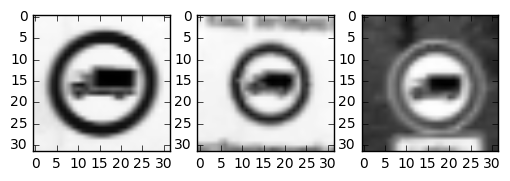

Mean of im1,2,3 =  165.642357611 182.199162545 89.7783627717
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 17


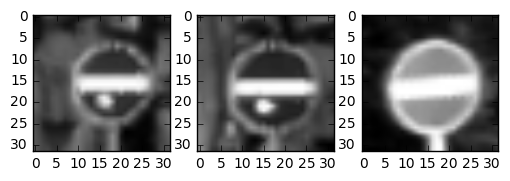

Mean of im1,2,3 =  67.6949994992 70.1367841448 83.2201831372
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 18


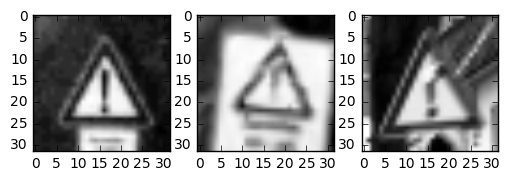

Mean of im1,2,3 =  62.3480902778 140.463654891 83.2305676424
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 19


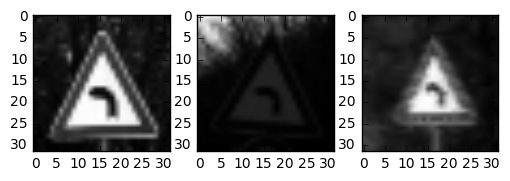

Mean of im1,2,3 =  54.6270683374 23.5433321221 43.1315811821
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 20


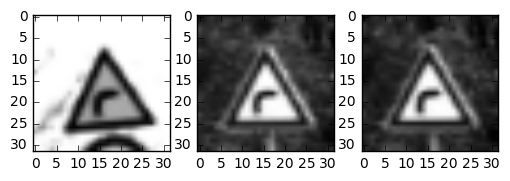

Mean of im1,2,3 =  194.719726562 58.8847510494 54.2896899288
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 21


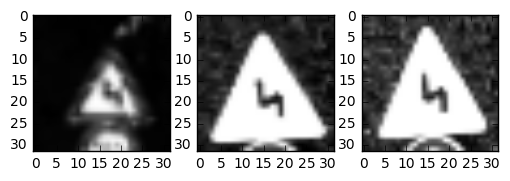

Mean of im1,2,3 =  33.6506453804 109.502689756 116.759001903
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 22


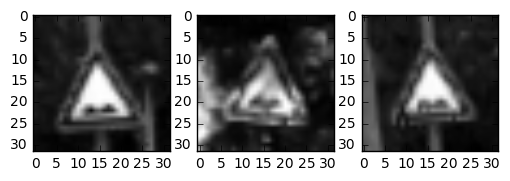

Mean of im1,2,3 =  42.6445480873 49.7513253348 44.1973666487
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 23


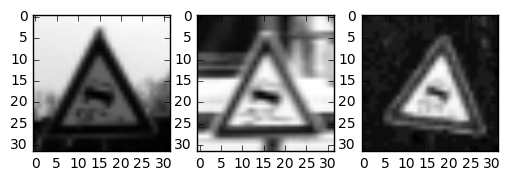

Mean of im1,2,3 =  117.615197054 122.85194327 47.4448939732
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 24


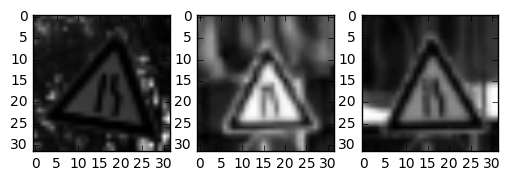

Mean of im1,2,3 =  26.8151129645 67.2439512915 47.4785293151
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 25


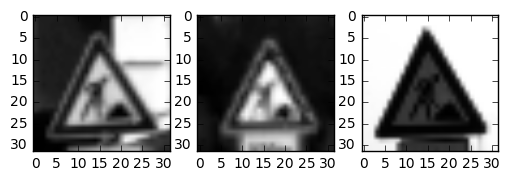

Mean of im1,2,3 =  99.3202545683 45.9809727823 155.933288574
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 26


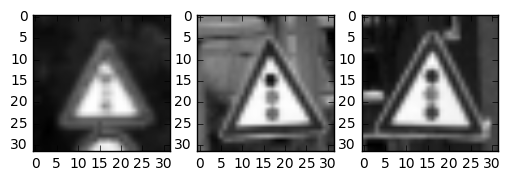

Mean of im1,2,3 =  53.6698267015 92.1867786754 68.3947686464
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 27


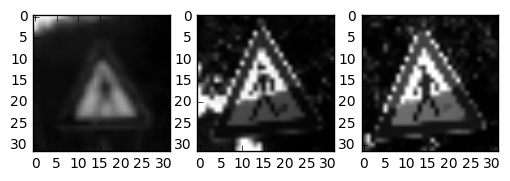

Mean of im1,2,3 =  28.4809439523 41.2378812123 39.8917545181
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 28


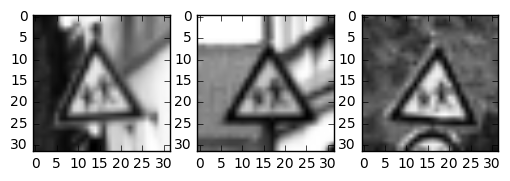

Mean of im1,2,3 =  102.457647365 126.854643486 73.6990792411
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 29


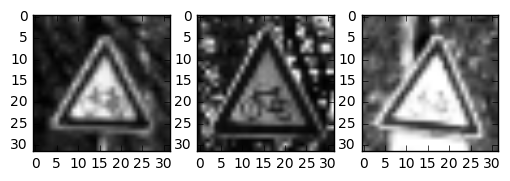

Mean of im1,2,3 =  55.6033761161 55.3109911481 112.416139294
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 30


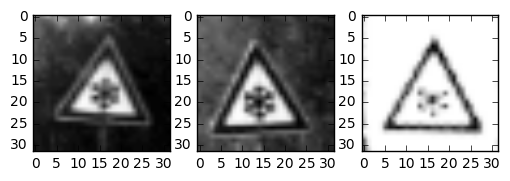

Mean of im1,2,3 =  46.6231984106 64.7604604868 225.528683546
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 31


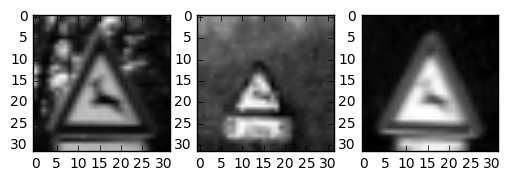

Mean of im1,2,3 =  56.6511937192 68.3869881466 54.0921193249
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 32


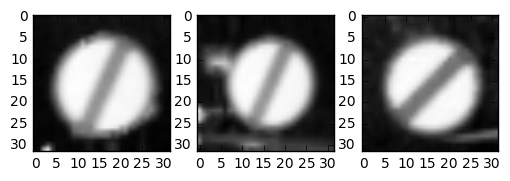

Mean of im1,2,3 =  89.5903320312 81.3618096558 83.954856179
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 33


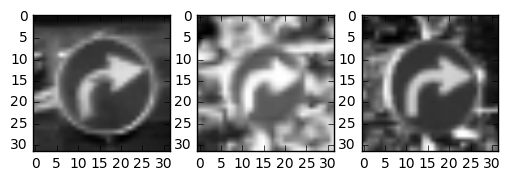

Mean of im1,2,3 =  63.6567982456 123.333555977 71.1598065639
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 34


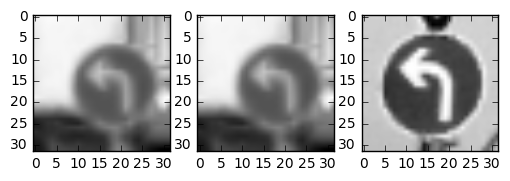

Mean of im1,2,3 =  131.014423077 131.014423077 134.291405014
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 35


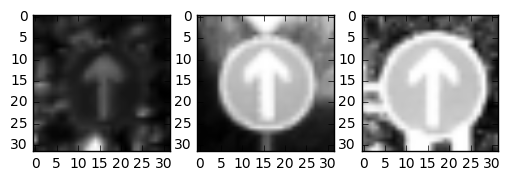

Mean of im1,2,3 =  33.2566784274 113.999132918 139.985481771
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 36


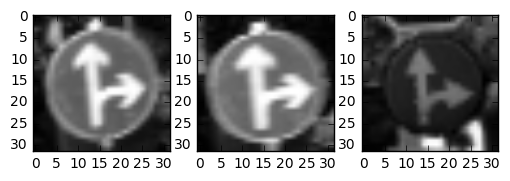

Mean of im1,2,3 =  80.4520456414 85.59088456 45.077749399
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 37


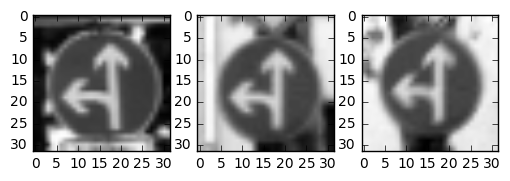

Mean of im1,2,3 =  74.1579293606 117.731291118 133.122446603
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 38


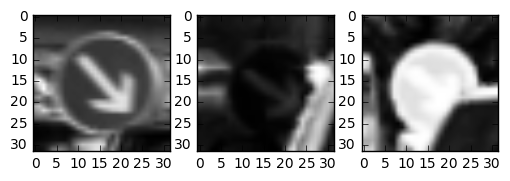

Mean of im1,2,3 =  70.5502554087 42.1257102273 101.267694794
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 39


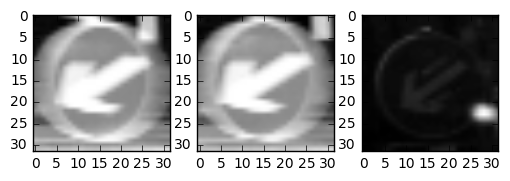

Mean of im1,2,3 =  139.4909232 140.928281776 16.295157823
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 40


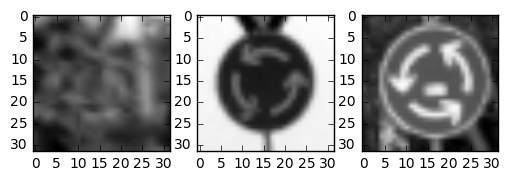

Mean of im1,2,3 =  66.851675851 143.403043927 79.9365234375
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 41


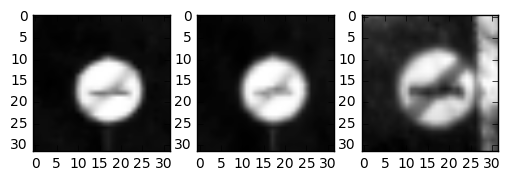

Mean of im1,2,3 =  44.7013820768 44.3373388453 75.6685384115
Max of im1,2,3 =  255.0 255.0 255.0
Current class = 42


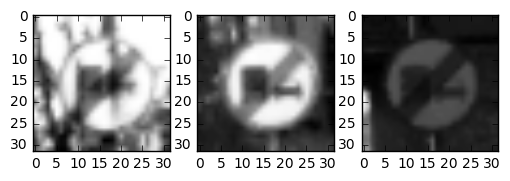

Mean of im1,2,3 =  156.852340698 88.2845998365 32.6056871916
Max of im1,2,3 =  255.0 255.0 255.0


In [19]:
"""Examine datasets"""
plot_random(X_test_preproc, class_dict_test)

In [20]:
"""Helper Functions"""

import numpy as np
def make_grayscale(x):
    x_shape = x.shape
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        r = curr_im[:,:,0]
        b = curr_im[:,:,1]
        g = curr_im[:,:,2]
        curr_im_gray = (r) / 3
        ret_images[i][:][:] = curr_im_gray
    return ret_images


def randomize_set(x,y):
    numel = len(y)
    print(type(x), type(y))
    print(x.shape, y.shape)
    listicle = [[i] for i in range(numel)]
    random.shuffle(listicle)
    x_shape = x.shape
    y_shape = y.shape
    ret_x = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    ret_y = np.ones((x_shape[0]))
    print(ret_x.shape, ret_y.shape)
    for i in range(numel):
        index = listicle[i]
        curr_x = x[index,:,:]
        curr_y = y[index]
        ret_x[i,:,:] = curr_x
        ret_y[i] = curr_y
        #print(index)
    return(ret_x,ret_y)

def make_one_hot_encoding(y, num_labels):
    print('Making one hot encoding')
    print(type(y), type(num_labels))
    print(y.shape, num_labels)
    y_shape = y.shape
    numel = y_shape[0]
    print(numel)
    #for i in range(numel):
    ret_y = np.zeros((numel, num_labels))
    print('Return y = ', ret_y.shape)
    for i in range(numel):
        curr_label = y[i]
        #print(i, curr_label)
        curr_encoding = np.zeros(num_labels)
        for j in range(num_labels):
            if j == int(curr_label):
                #print('Match!', j, curr_label)
                curr_encoding[j] = 1.0
        #print(curr_encoding)
        ret_y[i] = curr_encoding        
    return ret_y

def expand_x(x):
    shape_x = x.shape
    print('Length is = ', len(shape_x))
    if len(shape_x) == 3:
        print('Expanding')
        ret_x = np.empty((shape_x[0],shape_x[1],shape_x[2],1))
        ret_x[:,:,:,0] = x
        print(ret_x.shape)
        print('Example value = ', ret_x[0,0,0,0])
    return(ret_x)


In [21]:
"""Format training and test data"""
X_test_gray = make_grayscale(X_test)
X_train_gray = make_grayscale(X_train)
[X_test_shuff, y_test_shuff] = randomize_set(X_test_gray, y_test)
[X_train_shuff, y_train_shuff] = randomize_set(X_train_gray, y_train)
print(X_test_shuff.shape, y_test_shuff.shape)
print(X_train_shuff.shape, y_train_shuff.shape)
print(type(X_test_shuff), type(y_test_shuff))
print(type(X_train_shuff), type(y_train_shuff))
y_shuff_onehot_test = make_one_hot_encoding(y_test_shuff, 43)
y_shuff_onehot_train = make_one_hot_encoding(y_train_shuff, 43)
print(y_shuff_onehot_test.shape, y_shuff_onehot_train.shape)
training_data = expand_x(X_train_shuff)
training_labels = y_shuff_onehot_train
test_data = expand_x(X_test_shuff)
test_labels = y_shuff_onehot_test
print(' ')
print('Type of training data = ', type(training_data))
print('Type of training labels = ', type(training_labels))
print('Shape of training labels = ', training_labels.shape)
print('Shape of training data = ', training_data.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(12630, 32, 32) (12630,)
(12630, 32, 32) (12630,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(39209, 32, 32) (39209,)
(39209, 32, 32) (39209,)
(12630, 32, 32) (12630,)
(39209, 32, 32) (39209,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Making one hot encoding
<class 'numpy.ndarray'> <class 'int'>
(12630,) 43
12630
Return y =  (12630, 43)
Making one hot encoding
<class 'numpy.ndarray'> <class 'int'>
(39209,) 43
39209
Return y =  (39209, 43)
(12630, 43) (39209, 43)
Length is =  3
Expanding
(39209, 32, 32, 1)
Example value =  15.3333333333
Length is =  3
Expanding
(12630, 32, 32, 1)
Example value =  14.6666666667
 
Type of training data =  <class 'numpy.ndarray'>
Type of training labels =  <class 'numpy.ndarray'>
Shape of training labels =  (39209, 43)
Shape of training data =  (39209, 32, 32, 1)


In [22]:
"""Neural Network helper functions"""

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.tanh(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# Create model
def conv_net(x, weights, biases):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv2)

    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.tanh(fc1)

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [23]:
# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

NameError: name 'tf' is not defined

Time for last epoch =  5


In [37]:
import time
import tensorflow as tf

# Parameters
learning_rate = 0.001
batch_size = 128
training_epochs = 100

n_input = 1024  # Data input taps. 32 * 32 = 1024
n_classes = 43  # Total classes

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}

# Set up data
training_data = expand_x(X_train_shuff)
training_labels = y_shuff_onehot_train
total_samples = len(training_labels)

test_data = expand_x(X_test_shuff)
test_labels = y_shuff_onehot_test

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [1024, layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

# tf Graph input
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])

logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)


# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle
    print('Starting first epoch')
    for epoch in range(training_epochs):
        start_time = time.time()        
        total_batch = int(total_samples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_x = training_data[i*batch_size:i*batch_size+batch_size,:,:]
            batch_y = training_labels[i*batch_size:i*batch_size+batch_size]            
            
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
        elapsed_time = time.time() - start_time
        print('Time for last epoch (sec) = ', int(elapsed_time))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(
        "Accuracy:",
        accuracy.eval({x: test_data, y: test_labels}))

Length is =  3
Expanding
(39209, 32, 32, 1)
Example value =  22.6666666667
Length is =  3
Expanding
(12630, 32, 32, 1)
Example value =  56.0
Epoch: 0001 cost= 14.967689514
Time for last epoch (sec) =  128
Epoch: 0002 cost= 7.793766022
Time for last epoch (sec) =  129


KeyboardInterrupt: 

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

***Grayscale***: Convert from RGB to grayscale. For instance the training data went from size (12630, 32, 32, 3) to (12630, 32, 32)

***Gaussian blur***: Option. Did not use in final implementation.

***Normalization***: Since original pixel values are 0 to 256, subtract 128 from  each pixel to center values around zero.

***Randomize data***: In initial dataset, images are ordered according to type. Learning may look better if this is randomized.

***One-hot encode the data***: Self explanatory.

***Expand data dimension***: TensorFlow did not like the data in form (12630, 32, 32), so I had to expand a dimension for the color channel. The form for processing is (12630, 32, 32, 1).

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I used a training and validation set only (in my code the validation set is called 'test'). I understand the purpose of having the formal test set is to avoid overfitting caused by learning bleeding back into the training set through the human overlord.

I did not generate additional data, though I thought about using transformations on the signs to put images in different orientations.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.